C:\Users\Lacuesta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Lacuesta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Lacuesta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Lacuesta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory le

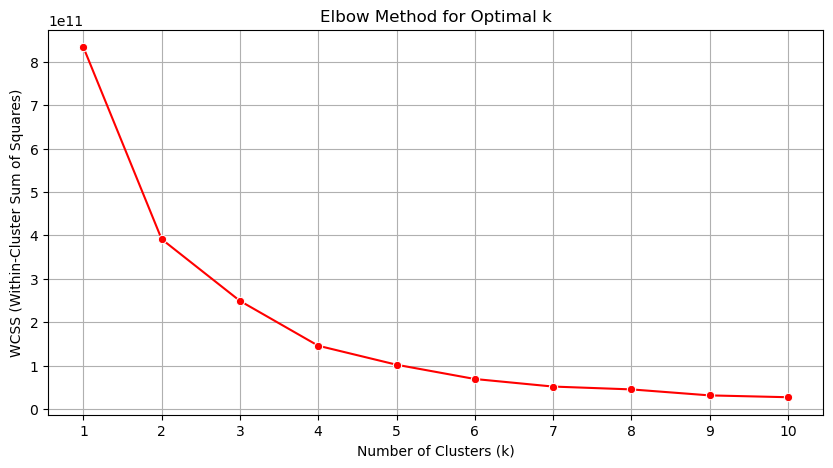

In [17]:
import os
os.environ["OMP_NUM_THREADS"] = "3"
# Load the dataset
import pandas as pd
df = pd.read_csv("nigerian-songs.csv")

# Convert release_date to release_year
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

# Select relevant features
features = [
    'popularity', 'acousticness', 'energy', 'instrumentalness',
    'liveness', 'loudness', 'speechiness', 'tempo',
    'time_signature', 'danceability', 'length', 'release_year'
]

# Drop missing values
X = df[features].dropna()

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Compute WCSS for 1 to 10 clusters
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='red')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()
